## Credit risk
### Will the Customer pay the financing or not?
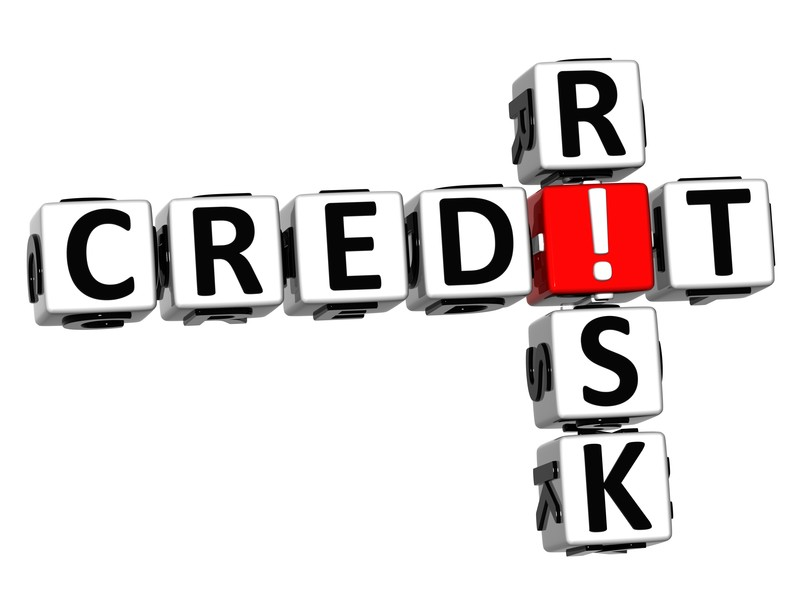

*Source*: www.smithhanley.com/2018/06/07/credit-risk-managers-big-data/


Hello Kagglers, how's it going?
In this notebook we're gonna dive into the INCREDIBLE credit risk world and how to do an EDA for that matter. Before we get started, let's have a look at theory and, then, move on more aspects. Enjoy the reading! Stay tuned! 

Best Regards,
Cris & Rodrigo


P.s: I've literraly copied all the info from Investopedia. For more information, please go to https://www.investopedia.com/ 

#### DEFINITION
..."Credit risk is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations. Traditionally, it refers to the risk that a lender may not receive the owed principal and interest, which results in an interruption of cash flows and increased costs for collection. Excess cash flows may be written to provide additional cover for credit risk. When a lender faces heightened credit risk, it can be mitigated via a higher coupon rate, which provides for greater cash flows.


Although it's impossible to know exactly who will default on obligations, properly assessing and managing credit risk can lessen the severity of a loss. Interest payments from the borrower or issuer of a debt obligation are a lender's or investor's reward for assuming credit risk..."


#### KEY TAKEAWAYS
* Credit risk is the possibility of losing a lender takes on due to the possibility of a borrower not paying back a loan. 
* Consumer credit risk can be measured by the five Cs: credit history, capacity to repay, capital, the loan's conditions, and associated collateral.
* Consumers posing higher credit risks usually end up paying higher interest rates on loans.



#### UNDESTANDING CREDIT RISK
When lenders offer mortgages, credit cards, or other types of loans, there is a risk that the borrower may not repay the loan. Similarly, if a company offers credit to a customer, there is a risk that the customer may not pay their invoices. Credit risk also describes the risk that a bond issuer may fail to make payment when requested or that an insurance company will be unable to pay a claim.

Credit risks are calculated based on the borrower's overall ability to repay a loan according to its original terms. To assess credit risk on a consumer loan, lenders look at the five Cs: credit history, capacity to repay, capital, the loan's conditions, and associated collateral.1

Some companies have established departments solely responsible for assessing the credit risks of their current and potential customers. Technology has afforded businesses the ability to quickly analyze data used to assess a customer's risk profile.

If an investor considers buying a bond, they will often review the credit rating of the bond. If it has a low rating (< BBB), the issuer has a relatively high risk of default. Conversely, if it has a stronger rating (BBB, A, AA, or AAA), the risk of default is progressively diminished.

Bond credit-rating agencies, such as Moody's Investors Services and Fitch Ratings, evaluate the credit risks of thousands of corporate bond issuers and municipalities on an ongoing basis.2﻿ 3﻿ For example, a risk-averse investor may opt to buy an AAA-rated municipal bond. In contrast, a risk-seeking investor may buy a bond with a lower rating in exchange for potentially higher returns.



#### CREDIT RISK VS. INTEREST RATES
⚡ **Important**: if there is a higher level of perceived credit risk, investors and lenders usually demand a higher rate of interest for their capital.

Creditors may also choose to forgo the investment or loan. For example, because a mortgage applicant with a superior credit rating and steady income is likely to be perceived as a low credit risk, they will receive a low-interest rate on their mortgage. In contrast, if an applicant has a poor credit history, they may have to work with a subprime lender—a mortgage lender that offers loans with relatively high-interest rates to high-risk borrowers—to obtain financing. The best way for a high-risk borrower to acquire lower interest rates is to improve their credit score; those struggling to do so might want to consider working with one of the best credit repair companies.

Similarly, bond issuers with less-than-perfect ratings offer higher interest rates than bond issuers with perfect credit ratings. The issuers with lower credit ratings use high returns to entice investors to assume the risk associated with their offerings.



*Source*: https://www.investopedia.com/terms/c/creditrisk.asp


## Data Description

### Objective

The purpose of this database is to provide information about a bank's customers so that machine learning models can be developed that can predict whether a particular customer will repay the loan or not.

Variable Name Description Type

* clientid = Client id Person
* income   = Income of the client
* age      = Age of client
* loan     = Load value.
* default  = target 0 good client, 1 not.

## Icon Description
### What's its purpose? 🤔
In order to help the kagglers and visitors to navegate through the notebook with something that highlights the topic and avoid getting lost during the reading.

* 🔎 = EDA
* 🔧 = Feature Engineering
* 📝 = Feature Selection
* 🧪 = Feature Transformation
* 🧮 = Descriptive Measures or Descriptive Analysis
* ⛏ = Data-Mining
* 🧹🗑 = Data Cleaning & Dumping
* 📊 = Data Visualization
* ✂ = Cut-offs
* 💬 = Comments or Explanations 
* 📥 = Loading dataset 
* 💾 = Saving dataset
* 🥇 = Best
* 🔐 = Code Session
* 📚 = Data Dictionary or Python Libraries
* ⚡ = Important stuff

# 🔐 Code Session

-----------------------

## 📚 Imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

pd.set_option('max_columns', 50)

## 📥 Load dataset

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
%%time
df = pd.read_csv('/kaggle/input/credit-risk/original.csv')

In [ ]:
# quick look at the dataset
df.info()

> ## Variable types

I prefere to use this approach of separating variable types as a list to make clear which one is numerical and which one is categorical. In my opinion, this quick split helps to see suitable data transformation and data plots for each case. Thus, it's up to the data scientist's convenience to use it or not.

In [ ]:
target = 'default'  
num_vars = list(df.columns.drop(['clientid', 'default']))
#cat_vars = list(df.columns.drop([''])) # there's no categorical features within the dataset

## 🔎 EDA (Exploratory Data Analysis) 

## 💬 What's the EDA?

I've literally copied the meaning of EDA from this website https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm 'cus it's a fabulous definition of it.

"...Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to:

1. maximize insight into a dataset;
2. uncover underlying structure;
3. extract important variables;
4. detect outliers and anomalies;
5. test underlying assumptions;
6. develop parsimonious models; and
7. determine optimal factor settings

..."


##  💬 **What's the Overall EDA and Local EDA?**

I've created these 2 techniques to be applied into the EDA: I call them as Local EDA and Overall EDA. But, before we diving into them, I trully recommend to you to have a data dictionary (if possible) and to take down any comments, questions or alert points during this journey. One last tip I'd like to share is to clear out any questions along with Business Areas (if possible), since they know the business and the every day process as a whole. 


**LOCAL EDA**

Understanding of **DATA STORY**, literally exploring the database. How? Just take any 'id' and navigate throughout the database (or databases) and over this 'navegation', try to understand what's going on with this 'id' within the dataset (datasets). The local EDA only works if your data has 'id' column or any column that individualises each database line. Apart from data dictionary, another option is, if none of the previous ones work, to gather info from Internet, articles, books, etc, in order to get the business context and insights and use them over your data analysis (do not forget taking down questions to be answered by Data Areas or Business Areas). So, the main goals of the local EDA method are:
* to have a more focused view of what is happening with such an 'id' across the database (or databases)
* to have a better understanding of the **DATA STORY** (what the data tells us)
* to write down any questions to be asked to the Business Area

**OVERALL EDA**

Understanding the whole data statistical distribution pattern (I personally recommend this great tool that helps out a lot: panda profiling. So, the main objectives behind the Overall EDA technique are:
* to detect possible inconsistencies within the data;
* to have a general comprehension of the descriptive measures and, therefore, the data statistical distribution
* to have a general understanding of “dirty” data or “alert” data (zeros, missing values, Outliers, etc.)
* to write down any questions to be asked to the Business Area


## 💬 **What's the Automated EDA?**

**AUTOMATED EDA (AEDA)**
#### Have you ever heard of it?

Basically, the Automated Exploratory Data Analysis (AEDA) is a tool to explore the database and summarize the main characteristics of it often using visual method. My favourite one is Pandas Profiling.

I've been readind so many articles on Internet to raise all types of Automated EDA (AEDA) to share here on Kaggle. From all thoses papers, one of them has caught my attention: it's an article written by Saurav Anand. This blessed soul has made a terrific curatorship about AEDA and, in my humble opinion, it’s well worth having a look at it at any moment you are free. Here is the link (below): 
* https://medium.com/datadriveninvestor/10-python-automatic-eda-libraries-which-makes-data-scientist-life-easier-825d0a928570

Other great sources:
* https://towardsdatascience.com/sweetviz-automated-eda-in-python-a97e4cabacde
* https://medium.com/analytics-vidhya/automated-eda-for-classification-77c25b847e43
* https://analyticsindiamag.com/tips-for-automating-eda-using-pandas-profiling-sweetviz-and-autoviz-in-python/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,data%20we%20are%20working%20on.&text=that%20the%20data%20set%20is,on%20by%20visualizing%20the%20dataset.


Well...after those brief explanations, it's time to put our hands on! 
Let's have fun a bit! 😉

### Local EDA


In [ ]:
# choosing any id
df.tail()

###  <font color=blue>💬 Comments
<font color=darkblue>
<pre></pre> 

I've randomly chosen two IDs to understand what happened with them through data. The client ID number **1996** is **48** years old and posses a sallary around **59221.04** dollars and a loan that represents **3.25%** of the income. On the other hand, the client ID **1998** is younger (**28** years of age) and has an income around **44311.45** and a loan that represents **12.46%**.

**Data Story**: It's a database that shows us different client profiles and their financial health (how much they make and what is the debt percent they have)

### Overall EDA

### 🧮 Descriptive Measures

In [ ]:
descriptive_measures = round(df.drop(['clientid','default'],axis=1).describe(),2)
descriptive_measures

### 📊 Data Visualization

#### dependent variable (*target*)

In [ ]:
# Visualização da variável binária (target)
df.default.value_counts().plot(kind = 'bar', color = ['C0', 'C1'], figsize=(6, 3), rot=0, title='PLOT: DEFAULT')
plt.xlabel("EVENT: |  0=Default  |  1=No Default")
plt.ylabel("ABSOLUTE FREQUENCY (count)");

In [ ]:
# Overview of  binary variable (target)
inad = df.default.value_counts()[0]
ad = df.default.value_counts()[1]
print('Total NO DEFAULT(0):', ad, 'lines, representing',round((ad/(inad+ad))*100,2),'% of the dataset')
print('Total DEFAULT(1):', inad, 'lines, representing',round((inad/(inad+ad))*100,2),'% of the dataset')

###  <font color=blue>💬 Comments
<font color=darkblue>
<pre></pre> 

* The 'PLOT:DEFAULT' chart above shows that the DEFAULT event is considered a **RARE EVENT**, representing **14.15%** of the total 
* 🚩 **ATTENTION POINT**: **UNBALANCED** data (think about some type of treatment for a model such as: Oversampling or Undersampling)

#### independent variable (*features*)

In [ ]:
# code for plotting multiple HISTOGRAM
fig, axs = plt.subplots(3,1, figsize=(10, 5),constrained_layout=True)
axs[0].hist(df['income'],bins=100)
axs[1].hist(df['age'], bins=100)
axs[2].hist(df['loan'], bins=100)
plt.show();

In [ ]:
# code for plotting multiple SCATTER PLOTS
fig, axs = plt.subplots(3,1, figsize=(10,10),constrained_layout=True)

axs[0].scatter(x=df['income'], y=df['default'], marker='o', color='r')
axs[1].scatter(x=df['age'], y=df['default'], marker='o', color='r')
axs[2].scatter(x=df['loan'], y=df['default'], marker='o', color='r')


plt.show();

In [ ]:
# code for plotting multiple BOXPLOTS
fig, axes = plt.subplots(1, 3, figsize=(20, 5),constrained_layout=True)
fig.suptitle('BOXPLOTS DE I, II and III', ha = 'right')
my_pal="Blues"

sns.boxplot(ax=axes[0], data=df, x = target, y="income", palette=my_pal)
sns.boxplot(ax=axes[1], data=df, x = target, y="age", palette=my_pal)
sns.boxplot(ax=axes[2], data=df, x = target, y="loan", palette=my_pal);

###  <font color=blue>💬 Comments
<font color=darkblue>
<pre></pre> 
    
**INCOME**
    
- The feature varies between 20014 and 69995.7 thousand, with an income average ~ 45331.6. Important aspects when looking at data:
     - 1) **quartiles** (Q1, Q2 and Q3) inform us of **quantity** and the respective value of **variation** around **32796.46 to 57791.28**;
        - Interpretation Q1 tells us that 25% of data has a income up to 32796.46 and 75% of data has an income above from it
        - Interpretation Q2 tells us that 50% of data has a income up to 45789.12 and 75% of data has an income above from it
        - Interpretation Q3 tells us that 75% of data has a income up to 57791.28 and 25% of data has an income above from it
     - 2) The MINIMUM value of 20014 and MAXIMUM value of 69995.7 does not indicate **POSSIBLE INCONSISTENCY IN DATA** once there is nothing within data that really catches my eye
     - 3) No missing values (0% of missing values)
     - 4) **Tendency**: according to scatter plot (above),there's no standard to define such tendency. There are ids within good or bad payer at any income available
     - 5) According to graphical visualization (scatter and boxplot), the feature 'INCOME' does not seem to be a candidate variable for predictor to explain the variability of y (Feature Selection), since there's no differences between the variabilities of each label, 1 and 0. Therefore, such visualizations have the sensation of lack of "movement" in both charts. The ideal situation is to TEST and get the outcomes. Perhaps if we combined with other variables, this feature becomes significant for the model 
<pre> </pre>
    
**AGE**
    
- The feature varies between -52 and 64, with an age average ~ 41 years old. Important aspects when looking at data:
     - 1) **quartiles** (Q1, Q2 and Q3) tell us of **quantity** and the respective value of **variation** around **29 to 53**;
        - Interpretation Q1 tells us that 25% of data has an age up to 29 y.o and 75% of data has an age above from it
        - Interpretation Q2 tells us that 50% of data has an age up to 41 and 75% of data has an income above from it
        - Interpretation Q3 tells us that 75% of data has an age up to 53 and 25% of data has an income above from it
     - 2) The MINIMUM age of -52 and MAXIMUM age of 64 indicates **POSSIBLE INCONSISTENCY IN DATA** (who has a negative age, ins't it?). The ideal situation is to question Business Area and/or Data Area to clear it up. 
     - 3) Missing values detected in data (0.1% of missing values). However, this low percent won't cause any risk or impact on modeling
     - 4) **Tendency**: according to scatter plot (above), the older the person is, the more likely he/she is to be considered as a good payer and vice-verse.
     - 5) According to graphical visualization (scatter and boxplot), the feature 'AGE' does seem to be a candidate variable for predictor to explain the variability of y (Feature Selection), since there's differences between the variabilities of each label, 1 and 0. Therefore, such visualizations have the sensation of "movement" in both charts. The ideal situation is to TEST during the modeling.    
<pre> </pre>
    
**LOAN**
    
- The feature varies between 1.38 and 13766.05, with a loan average ~ 4444.37. Important aspects when looking at data:
     - 1) **quartiles** (Q1, Q2 and Q3) tell us of **quantity** and the respective value of **variation** around **1939.71 to 6432.41**;
        - Interpretation Q1 tells us that 25% of data has a loan up to 1939.71 and 75% of data has an age above from it
        - Interpretation Q2 tells us that 50% of data has a loan up to 3974.72 and 75% of data has an income above from it
        - Interpretation Q3 tells us that 75% of data has a loan up to 6432.41 and 25% of data has an income above from it
     - 2) The MINIMUM age of 1.38 and MAXIMUM age of 13766.05 does not indicate **POSSIBLE INCONSISTENCY IN DATA** once there is nothing within data that really catches my eye 
     - 3) No missing values (0% of missing values)
     - 4) **Tendency**: according to scatter plot (above), any loan with values up to 2500 shows a trend towards good payers. On the other hand, values above 2500 do not make it possible to separate good and bad payers.
     - 5) According to graphical visualization (scatter and boxplot), the feature 'AGE' does seem to be a candidate variable for predictor to explain the variability of y (Feature Selection), since there's differences between the variabilities of each label, 1 and 0. Therefore, such visualizations have the sensation of "movement" in both charts. The ideal situation is to TEST during the modeling.   


In [ ]:
# Asymmetry x Kurtosis calculation 
data_k_s = {'Asymmetry':  df[num_vars].skew(), 'Kurtosis': df[num_vars].kurtosis()}
df_k_s = pd.DataFrame (data_k_s, columns = ['Asymmetry','Kurtosis'])
df_k_s

### Missing Values

In [ ]:
(df.isnull().sum()* 100 / len(df)).sort_values(ascending=False).head(10).reset_index()

In [ ]:
df.dropna(inplace=True)

### Data Duplicate Analysis

In [ ]:
df.drop(columns="clientid",inplace=True)

features = df.columns.values[0:30]
unique_max_train = []
for feature in features:
    values = df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])

np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

#### Value Counts Target

In [ ]:
df['default'].value_counts()

In [ ]:
train_X = df.drop(["default"], axis=1)
train_y = np.log1p(df["default"].values)

In [ ]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)

## plotando as importâncias ##
feat_names = df.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
def plot_new_feature_distribution(df1, df2, label1, label2, features, n):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,n,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,n,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

### Baseline

In [ ]:
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

In [ ]:
def logistic(X,y):
    y_train=df['default'].astype('uint8')
    X_train,X_test,y_train,y_test=train_test_split(df.drop('default',axis=1),y_train,test_size=.2,random_state=2020)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    prob=lr.predict_proba(X_test)
    
    roc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
    print('roc ',roc)

    return (prob[:,1],y_test)
y_train=df['default'].astype('uint8')
probs,y_test=logistic(df.drop('default',axis=1),y_train)

In [ ]:
plot_roc(y_test,probs)

#### *Logistic Regression*

In [ ]:
train_x, val_x, train_y, val_y=train_test_split(df.drop('default',axis=1),y_train,test_size=.2,random_state=2020)

clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

In [ ]:
rocrl=roc_auc_score(val_y, pred_y)
rocrl

In [ ]:
plot_roc(val_y, pred_y)

#### *Random Forest Classifier*

In [ ]:
%%time
model = RandomForestClassifier(n_estimators=220).fit(train_x,train_y)
predictionforest = model.predict(val_x)

In [ ]:
%%time
rocrf=roc_auc_score(val_y, predictionforest)
print('roc ',rocrf)

In [ ]:
plot_roc(val_y, predictionforest)

In [ ]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 220)

xgb_cfl.fit(train_x, train_y)
y_scorexgb = xgb_cfl.predict_proba(val_x)[:,1]

In [ ]:
rocxgb=roc_auc_score(val_y, y_scorexgb)
print('roc ',rocxgb)

In [ ]:
plot_roc(val_y, y_scorexgb)

## Grid Search CV

In [ ]:
%%time
# Logistic regression 
log_cfl = LogisticRegression()

param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(train_x, train_y)

best_parameters = CV_log_cfl.best_params_
print("The best parameters: ", best_parameters)

#### *Logistic Regression*

In [ ]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(train_x, train_y)
y_scoreLR = log_cfl.decision_function(val_x)

In [ ]:
rocLR=roc_auc_score(val_y, y_scoreLR)
print('roc ',rocLR)

In [ ]:
plot_roc(val_y, y_scoreLR)

#### *Random Forest Classifier*

In [ ]:
rf_cfl = RandomForestClassifier(n_estimators=120).fit(train_x, train_y)

In [ ]:
param_grid = {
            'n_estimators': [50, 100, 200],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }

CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'roc_auc', verbose = 10, n_jobs = -1)
CV_rnd_cfl.fit(train_x, train_y)

best_parameters = CV_rnd_cfl.best_params_
print("The best parameters: ", best_parameters)

In [ ]:
rf_cfl = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                 max_features = best_parameters['max_features'],  
                                 min_samples_leaf = best_parameters['min_samples_leaf'],  
                                 min_samples_split = 5)
rf_cfl.fit(train_x, train_y)
y_score = rf_cfl.predict_proba(val_x)[:,1]

In [ ]:
rocRF=roc_auc_score(val_y, y_score)
print('roc ',rocRF)

In [ ]:
plot_roc(val_y, y_score)

#### *XGBClassifier*

In [ ]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
xgb_cfl.fit(train_x, train_y)
y_pred = xgb_cfl.predict(val_x)
y_score = xgb_cfl.predict_proba(val_x)[:,1]

In [ ]:
%%time
param_grid = {
            'n_estimators': [50, 100, 200]
              }

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='roc_auc', verbose = 2)
CV_xgb_cfl.fit(train_x, train_y)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters: ", best_parameters)

In [ ]:
%%time
param_grid = {
            'n_estimators': [50, 100, 200]
              }

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='roc_auc', verbose = 2)
CV_xgb_cfl.fit(train_x, train_y)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters: ", best_parameters)

In [ ]:
xgb_cfl2 = xgb.XGBClassifier(n_jobs = -1,n_estimators = 120)

xgb_cfl2.fit(train_x, train_y)
y_score2 = xgb_cfl.predict_proba(val_x)[:,1]

In [ ]:
rocxgb=roc_auc_score(val_y, y_score2)
print('roc ',rocxgb)

In [ ]:
plot_roc(val_y, y_score2)

#### *Voting Classifier*

In [ ]:
voting_cfl = VotingClassifier (
        estimators = [('xgb', xgb_cfl2), ('lt', log_cfl), ('rf', rf_cfl)],
                     voting='soft', weights = [0.27, 0.23, 0.5])
    
voting_cfl.fit(train_x, train_y)

y_pred = voting_cfl.predict(val_x)
y_score = voting_cfl.predict_proba(val_x)[:,1]

In [ ]:
rocV=roc_auc_score(val_y, y_score)
print('roc ',rocV)

In [ ]:
plot_roc(val_y, y_score)

## Final